# Machine Learning Models for Prediction of CO2 Emission with Exploratory Data Analysis 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy.random as nr #for random seed
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection as fs
from sklearn import model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt
import warnings 
warnings.filterwarnings('ignore')
import random
#for maintaining randomness
random_state = 1


In [9]:
# define file name
file_name = "Dataset.csv"

# read file from csv to pandas DataFrame
df = pd.read_csv(file_name)


In [62]:
df

,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,primary_energy_consumption
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,1.365100e+01
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,8.961000e+00
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,8.935000e+00
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,8.617000e+00
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,7.246000e+00
...,...,...,...,...,...,...,...,...,...,...,...
6586,Zimbabwe,2016,10.738,6.959,0.639,3.139,3.139,11.92,14030338.0,2.096179e+10,4.750000e+01
6587,Zimbabwe,2017,9.582,5.665,0.678,3.239,3.239,14236599.00,14236599.0,2.194784e+10,2.194784e+10
6588,Zimbabwe,2018,11.854,7.101,0.697,4.056,4.056,14438812.00,14438812.0,2.271535e+10,2.271535e+10
6589,Zimbabwe,2019,10.949,6.020,0.697,4.232,4.232,14645473.00,14645473.0,1.464547e+07,1.464547e+07


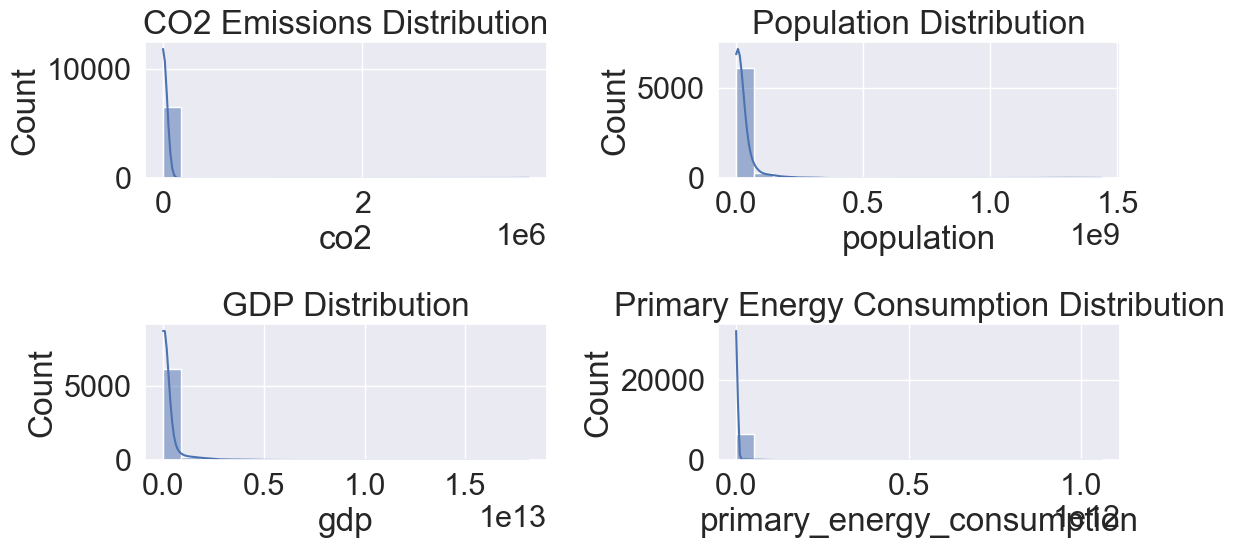

In [64]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='co2', bins=20, kde=True)
plt.title('CO2 Emissions Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='population', bins=20, kde=True)
plt.title('Population Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='gdp', bins=20, kde=True)
plt.title('GDP Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='primary_energy_consumption', bins=20, kde=True)
plt.title('Primary Energy Consumption Distribution')

plt.tight_layout()
plt.show()






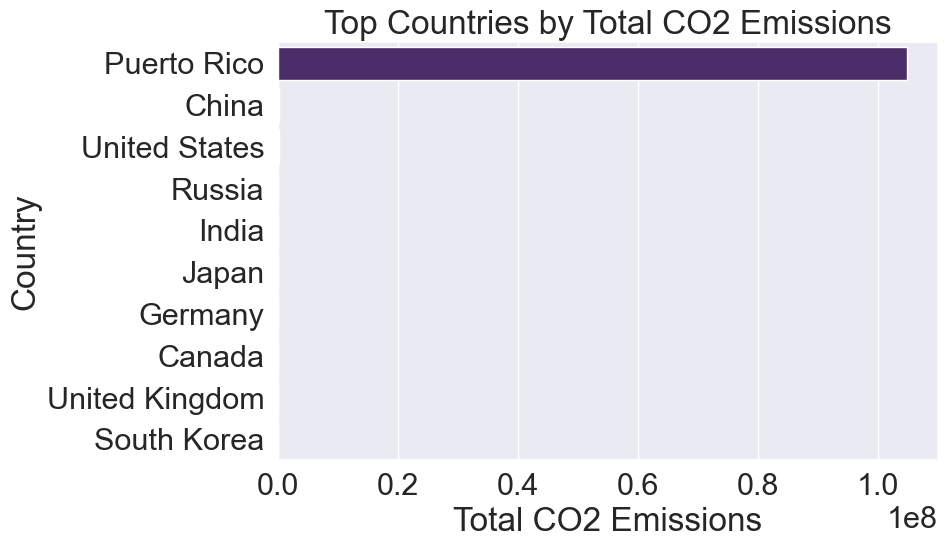

In [65]:
# Bar Plot: Top Countries by CO2 Emissions
top_countries = df.groupby('country')['co2'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top Countries by Total CO2 Emissions')
plt.xlabel('Total CO2 Emissions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#  Handling outlier from previous analysis

In [36]:
#Select relevant features from previous analysis
final_data = df[['country','year','co2','coal_co2','cement_co2','gas_co2','oil_co2','methane','population','gdp']]

In [37]:
#Remove Outliers (countries) with significantly  high range features
final_data = final_data[final_data['country'].isin(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Bulgaria', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Egypt', 'Estonia', 'Finland', 'France', 'Georgia', 'Ghana',
       'Greece', 'Guatemala', 'Hungary', 'Iceland', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Mexico', 'Moldova', 'Morocco', 'Mozambique',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Rwanda', 'Senegal', 'Serbia', 'Slovakia', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria',
       'Tajikistan', 'Tanzania', 'Thailand', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Yemen'])]

# Data Overview

In [38]:
final_data.shape

(2580, 10)

In [39]:
print('Columns and thier data types')
final_data.dtypes

Columns and thier data types


country        object
year            int64
co2           float64
coal_co2      float64
cement_co2    float64
gas_co2       float64
oil_co2       float64
methane       float64
population    float64
gdp           float64
dtype: object

In [40]:
print('Data preview')
final_data.head()

Data preview


,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10


In [41]:
print('data statistics:')
final_data.describe()

data statistics:


,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2.580000e+03,2.580000e+03,2.580000e+03
mean,2005.500000,94.802117,24.815933,3.072106,25.210552,40.262161,2.974476e+06,1.923039e+07,2.859366e+11
std,8.657119,134.255760,49.826997,4.922098,39.747343,58.616590,1.195580e+07,2.182666e+07,4.597042e+11
min,1991.000000,0.455000,0.001000,0.000000,0.000000,0.366000,5.100000e-01,2.576160e+05,3.107700e+01
25%,1998.000000,10.347250,0.502000,0.443750,1.876000,6.262000,6.000000e+00,4.628765e+06,2.745224e+10
50%,2005.500000,42.678000,3.619500,1.231500,8.023000,19.116000,1.547000e+01,1.004494e+07,9.807387e+10
75%,2013.000000,109.046500,23.419750,3.255000,27.715250,41.930750,6.320250e+01,2.674010e+07,3.144101e+11
max,2020.000000,671.631000,340.348000,37.272000,229.267000,291.123000,1.289328e+08,1.289328e+08,2.581674e+12


A pairplot of selected features before dimention reduction


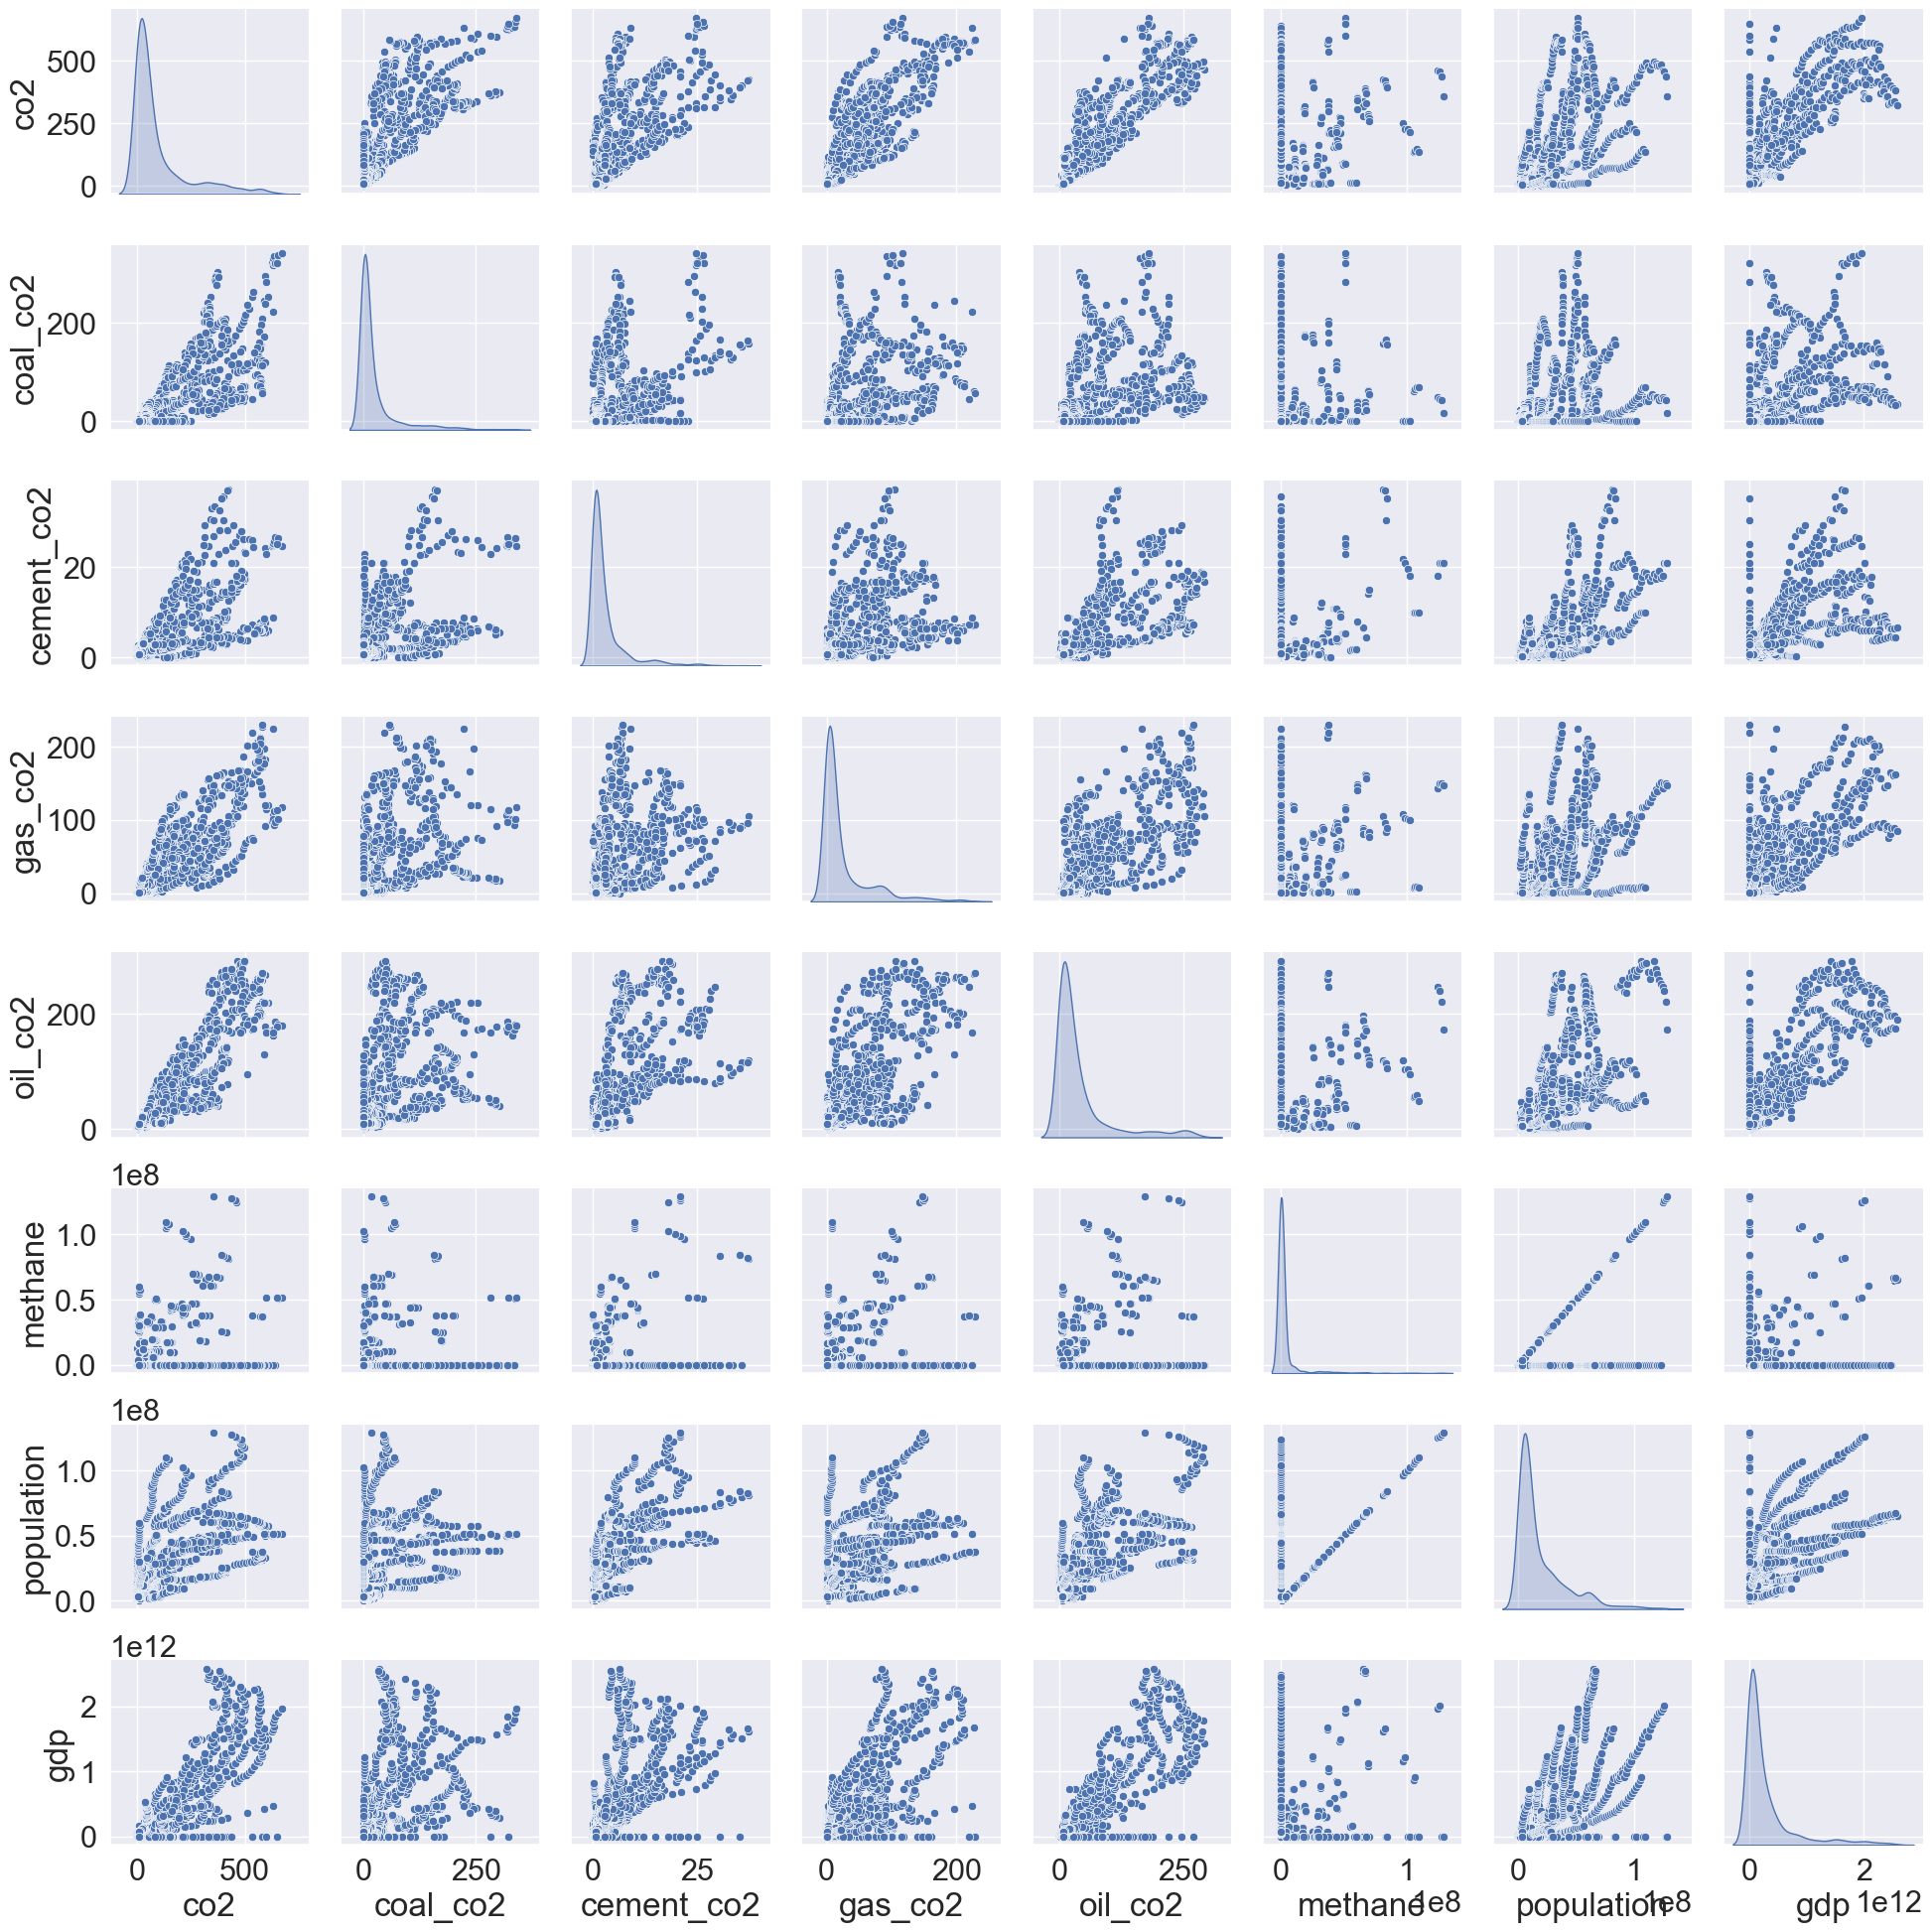

In [42]:
print('A pairplot of selected features before dimention reduction')
sns.pairplot(final_data[['co2', 'coal_co2', 'cement_co2', 'gas_co2', 'oil_co2', 'methane', 'population', 'gdp']],
             diag_kind="kde")

In [43]:
#dimensionality reduction
final_data['ccgo'] = final_data['cement_co2'] + final_data['gas_co2'] + final_data['oil_co2'] + final_data['coal_co2']
final_data['gdp_per_capita'] = final_data['gdp'] / final_data['population']
final_data.head()

,country,year,co2,coal_co2,cement_co2,gas_co2,oil_co2,methane,population,gdp,ccgo,gdp_per_capita
0,Afghanistan,1991,2.427,0.249,0.046,0.388,1.718,9.07,13299016.0,1.204736e+10,2.401,905.883692
1,Afghanistan,1992,1.379,0.022,0.046,0.363,0.927,9.00,14485543.0,1.267754e+10,1.358,875.185599
2,Afghanistan,1993,1.333,0.018,0.047,0.352,0.894,8.90,15816601.0,9.834581e+09,1.311,621.788531
3,Afghanistan,1994,1.282,0.015,0.047,0.338,0.860,8.97,17075728.0,7.919857e+09,1.260,463.807877
4,Afghanistan,1995,1.230,0.015,0.047,0.322,0.824,9.15,18110662.0,1.230753e+10,1.208,679.573506


In [44]:
data = final_data.drop(['cement_co2','gas_co2','oil_co2','coal_co2','gdp','population'],axis=1)
data.head()

,country,year,co2,methane,ccgo,gdp_per_capita
0,Afghanistan,1991,2.427,9.07,2.401,905.883692
1,Afghanistan,1992,1.379,9.00,1.358,875.185599
2,Afghanistan,1993,1.333,8.90,1.311,621.788531
3,Afghanistan,1994,1.282,8.97,1.260,463.807877
4,Afghanistan,1995,1.230,9.15,1.208,679.573506


In [45]:
data.year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)


#  Splitting the dataset into training and test data

In [46]:
ft_cols = ['year','methane','ccgo','gdp_per_capita']
lb_col = ['co2']

features = np.array(data[ft_cols])
label = np.array(data[lb_col]).ravel()

#Data splitting using sklearn train_test_split function
ft_train,ft_test,lb_train,lb_test = ms.train_test_split(features,label,test_size=0.3
                                                     ,shuffle = True, random_state= random_state)

scaler = StandardScaler()
scaler.fit(ft_train)

ft_train_s = scaler.fit_transform(ft_train)
ft_test_s = scaler.transform(ft_test)

In [47]:
ft_train_s

array([[ 0.15900207, -0.25260044, -0.22096958,  0.85153912],
       [-1.67367592, -0.2525981 ,  0.49570408, -0.44374836],
       [ 0.50262919, -0.25260063, -0.30821681,  1.82047812],
       ...,
       [ 0.15900207, -0.25259984, -0.34341951,  2.53447236],
       [ 1.18988343, -0.25259748, -0.44246848,  0.03615664],
       [-0.4137098 , -0.25260016, -0.03221955, -0.73429954]])

In [48]:
lb_train

array([ 62.8  , 157.982,  53.126, ...,  47.664,  37.055,  86.322])

# Using KNN

In [49]:
nr.seed(5)

KNR = KNeighborsRegressor()

k_parameters = {'n_neighbors': np.arange(1,40,1)}
KNR_cv_model = ms.GridSearchCV(KNR, k_parameters, cv = 5)

#Fitting the KNR model to the dataset
KNR_cv_model.fit(ft_train_s, lb_train)

#Best parameters
KNR_cv_model.best_params_

{'n_neighbors': 2}

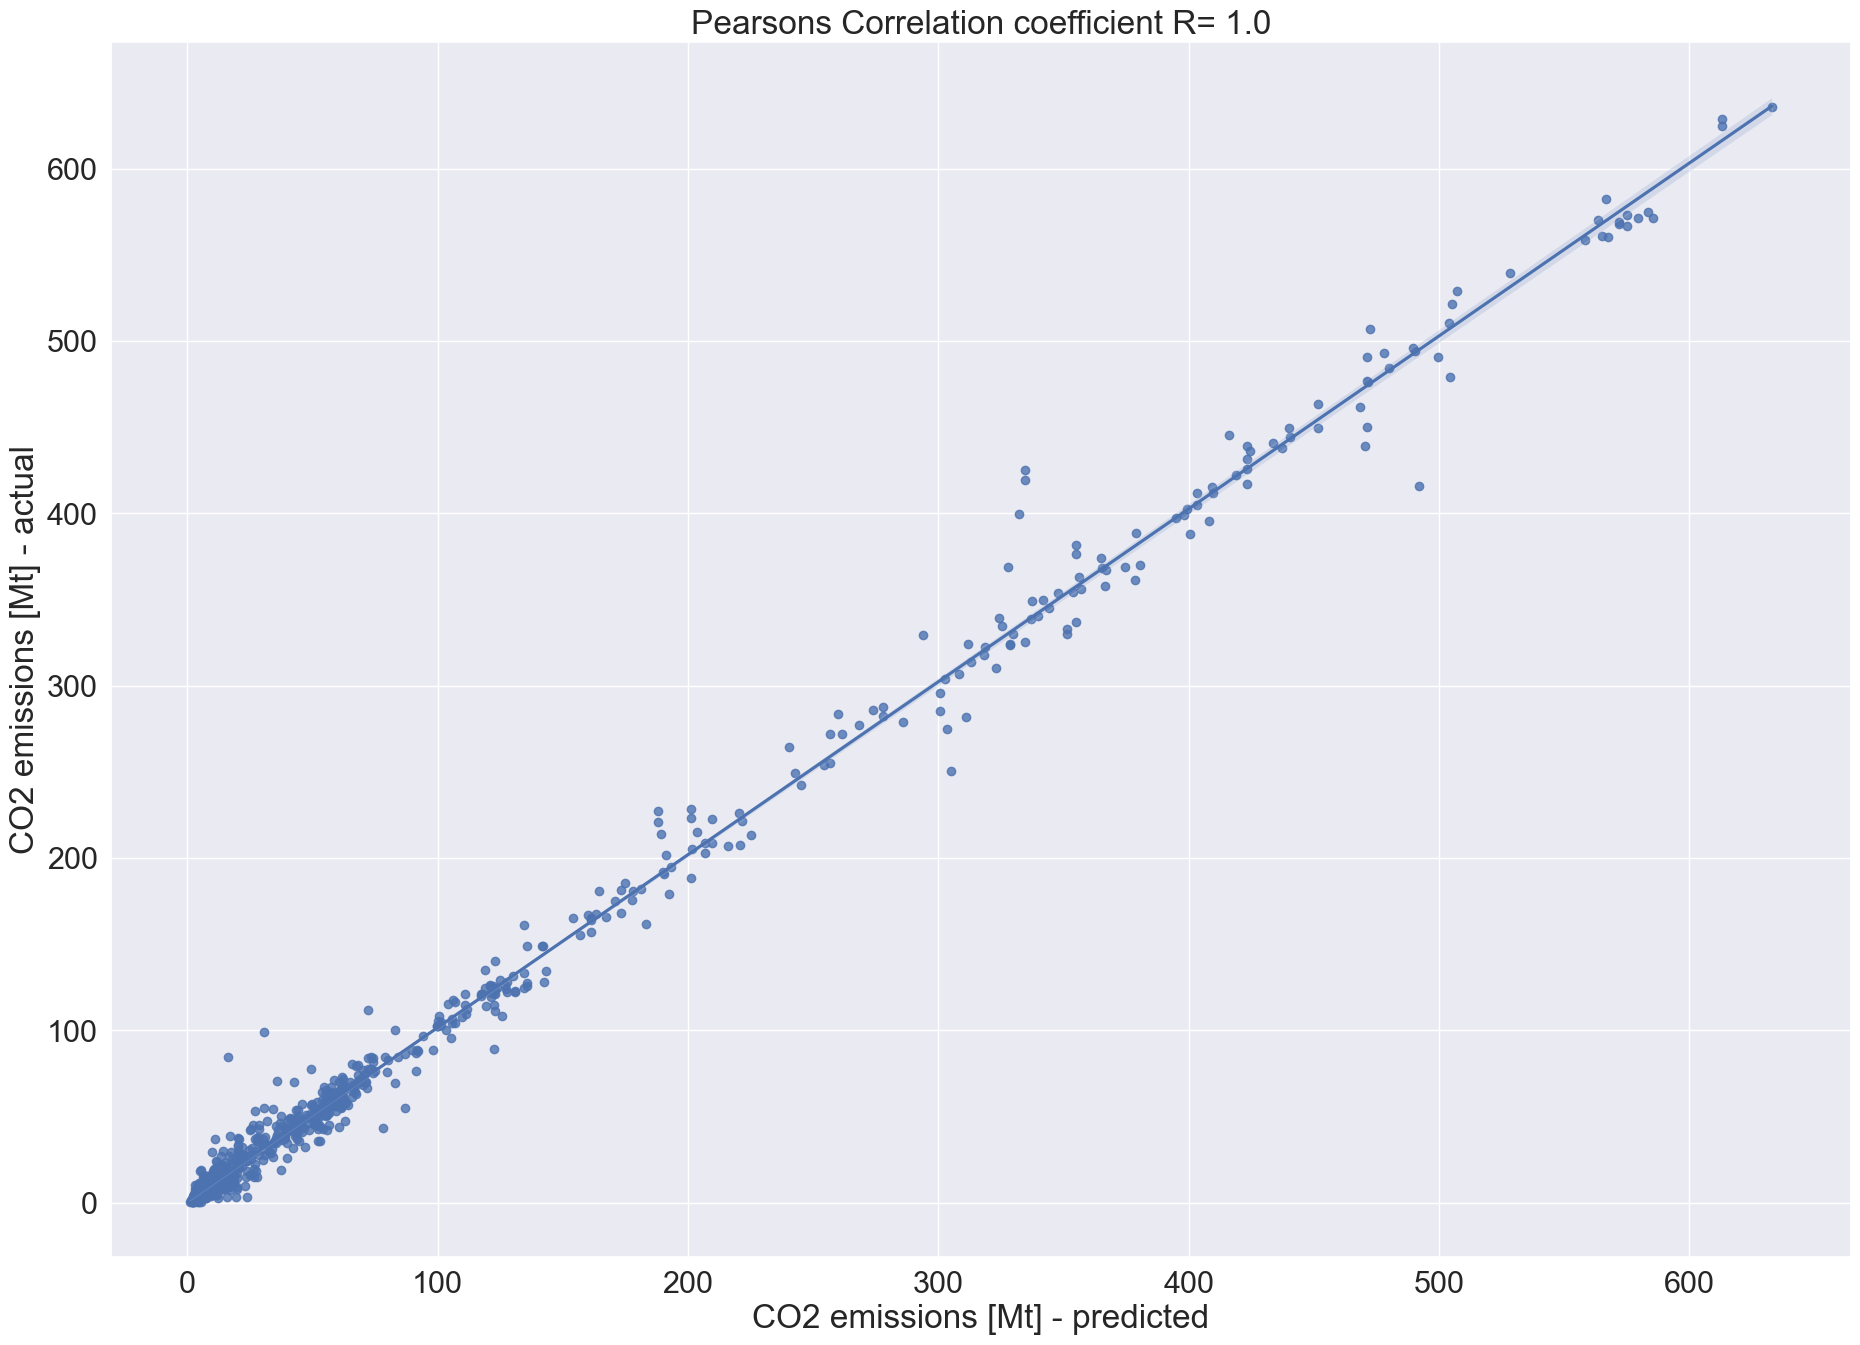

In [50]:
# Tuned model
KNR_tuned = KNR_cv_model.best_estimator_
# plot predicted vs actual values
predictions = KNR_tuned.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [Mt] - predicted")
plt.ylabel("CO2 emissions [Mt] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions,np.transpose(lb_test))[0,1],2)))
plt.show()

In [51]:
# Model Evaluation
test = lb_test
predictions = KNR_tuned.predict(ft_test_s)
print('Tuned KNeighborsRegressor')

KNN_MAE = mean_absolute_error(test, predictions)
print('MAE : {}'.format(KNN_MAE))
KNN_MSE = mean_squared_error(test, predictions)
print('MSE : {}'.format(KNN_MSE))
KNN_RMSE = sqrt(KNN_MSE)
print('RMSE : %f' % KNN_RMSE)
KNN_R2_score = r2_score(test, predictions)
print('R2_score : {}'.format(KNN_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions


Tuned KNeighborsRegressor
MAE : 6.528102067183463
MSE : 126.59289256847546
RMSE : 11.251351
R2_score : 0.9934831780045931


# Using Random Forest

In [52]:
RFR = RandomForestRegressor(random_state = 42)
#RFR_params = {'max_depth': list(range(1,10)),'max_features': [3],'n_estimators' : [10,20,30,40]}
# Getting the best parameter using Grid Search
#RFR_model = ms.GridSearchCV(RFR,RFR_params,cv = 5, n_jobs = -1,verbose = 2)
RFR.fit(ft_train_s, lb_train)
#Best parameters
#RFR_model.best_params_ 

RandomForestRegressor(random_state=42)

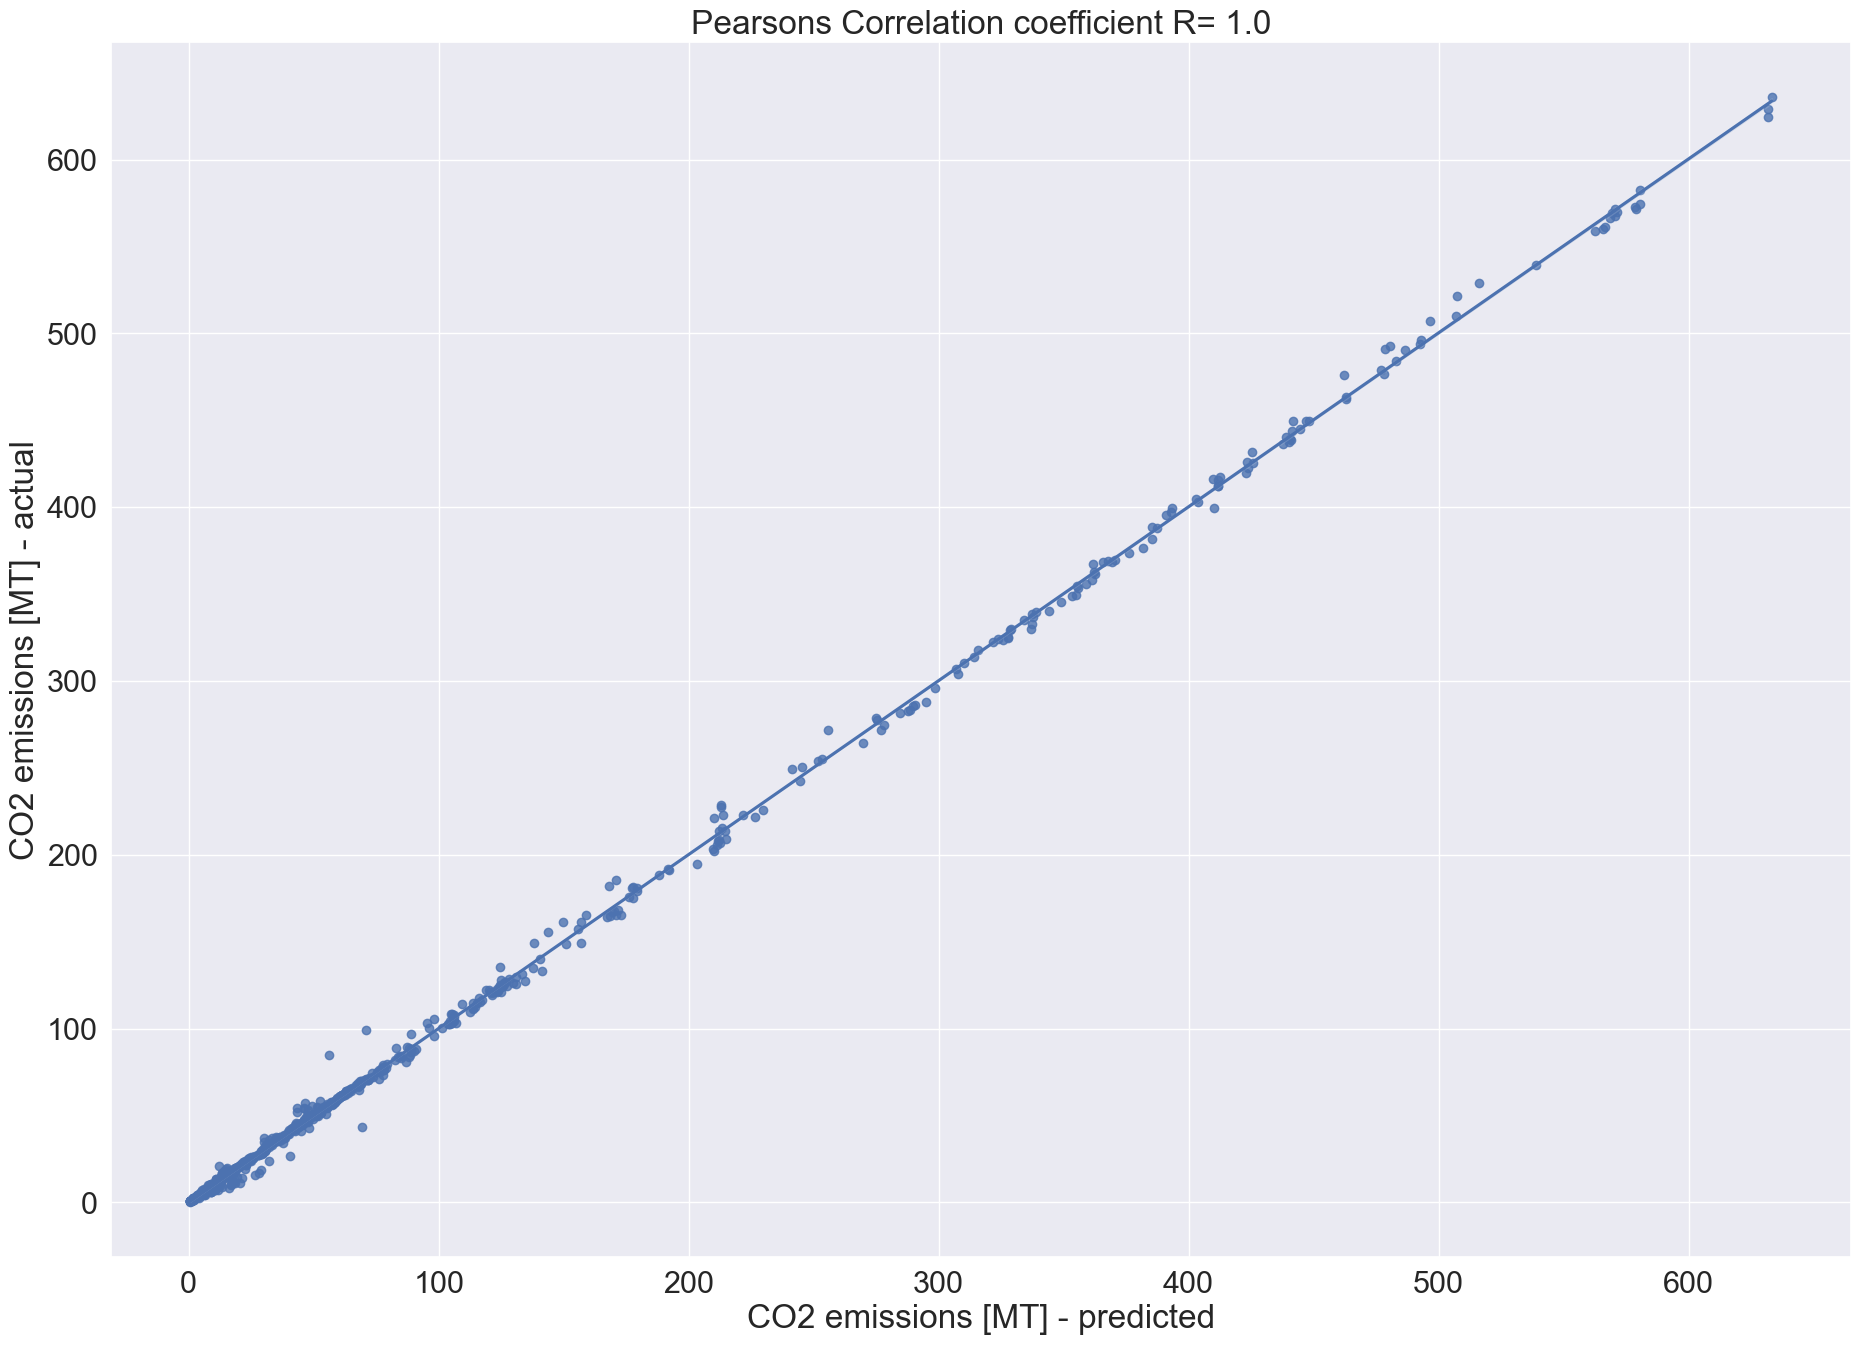

In [53]:
#RFR_tuned = RFR_model.best_estimator_
# plot predicted vs actual values
predictions1 = RFR.predict(ft_test_s)
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions1, y=np.transpose(lb_test), fit_reg=True)
plt.xlabel("CO2 emissions [MT] - predicted")
plt.ylabel("CO2 emissions [MT] - actual")
plt.title("Pearsons Correlation coefficient R= {}".format(round(np.corrcoef(predictions1,np.transpose(lb_test))[0,1],2)))
plt.show()

In [54]:
# Model Evaluation
test = lb_test
predictions1 = RFR.predict(ft_test_s)
print('Tuned Random Forest')

RF_MAE = mean_absolute_error(test, predictions1)
print('MAE : {}'.format(RF_MAE))
RF_MSE = mean_squared_error(test, predictions1)
print('MSE : {}'.format(RF_MSE))
RF_RMSE = sqrt(RF_MSE)
print('RMSE : %f' % RF_RMSE)
RF_R2_score = r2_score(test, predictions1)
print('R2_score : {}'.format(RF_R2_score))
frame = pd.DataFrame()
frame['test'] = test
frame['predictions'] = predictions1

Tuned Random Forest
MAE : 1.9322234754521888
MSE : 13.298417601025394
RMSE : 3.646700
R2_score : 0.999315416382641


In [55]:
#Summary of model scores from different metrics
KNN_model = KNN_MAE,KNN_MSE,KNN_RMSE,KNN_R2_score
RF_model = RF_MAE,RF_MSE,RF_RMSE,RF_R2_score
summary = pd.DataFrame([KNN_model,RF_model],
                       index = ['KNN','RF'], 
                       columns = ['MAE','MSE','RMSE','R2_score'])
summary

,MAE,MSE,RMSE,R2_score
KNN,6.528102,126.592893,11.251351,0.993483
RF,1.932223,13.298418,3.646700,0.999315


Text(0.5, 1.0, 'Mean absolute error of models [MT]')

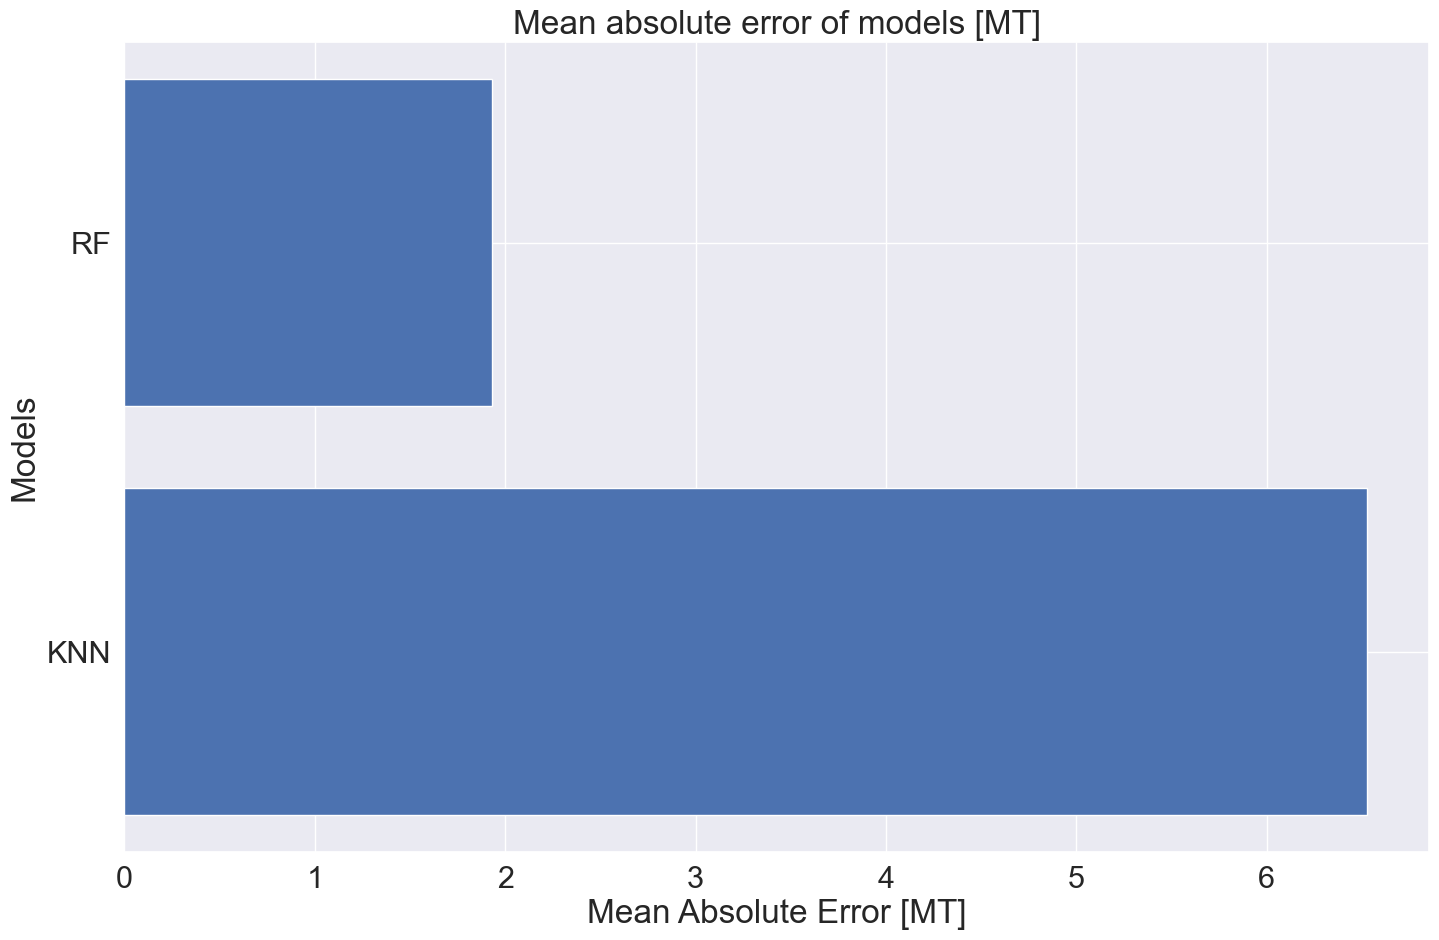

In [56]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['MAE'], y = summary.index)
plt.xlabel("Mean Absolute Error [MT]")
plt.ylabel("Models")
plt.title("Mean absolute error of models [MT]")

Text(0.5, 1.0, 'Mean Squared Error of models [MT]')

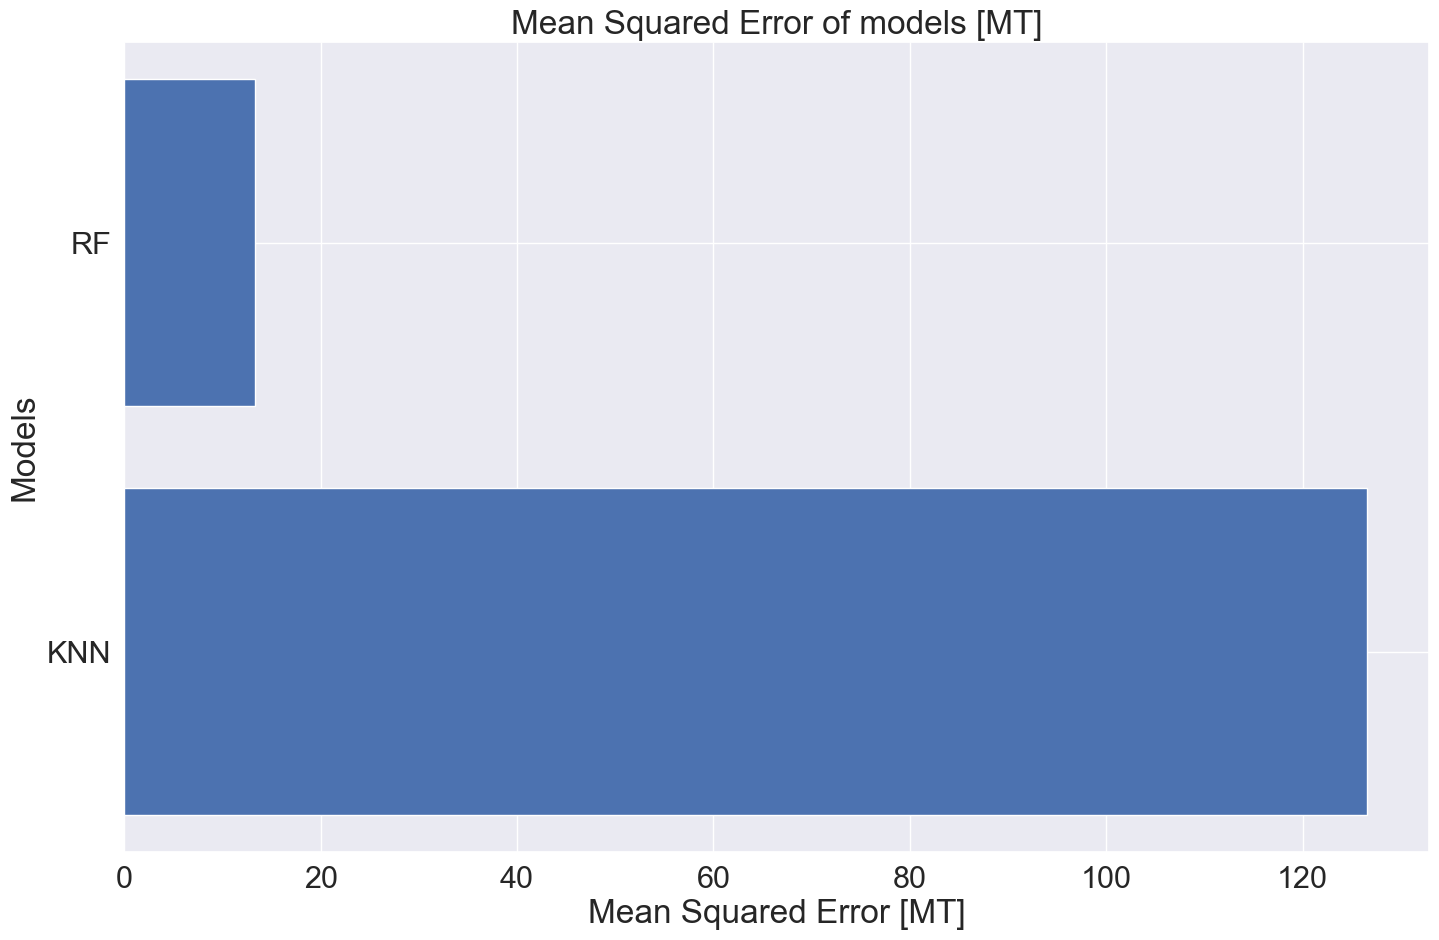

In [57]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['MSE'], y = summary.index)
plt.xlabel("Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Mean Squared Error of models [MT]")

Text(0.5, 1.0, 'Root Mean Squared Error of models [MT]')

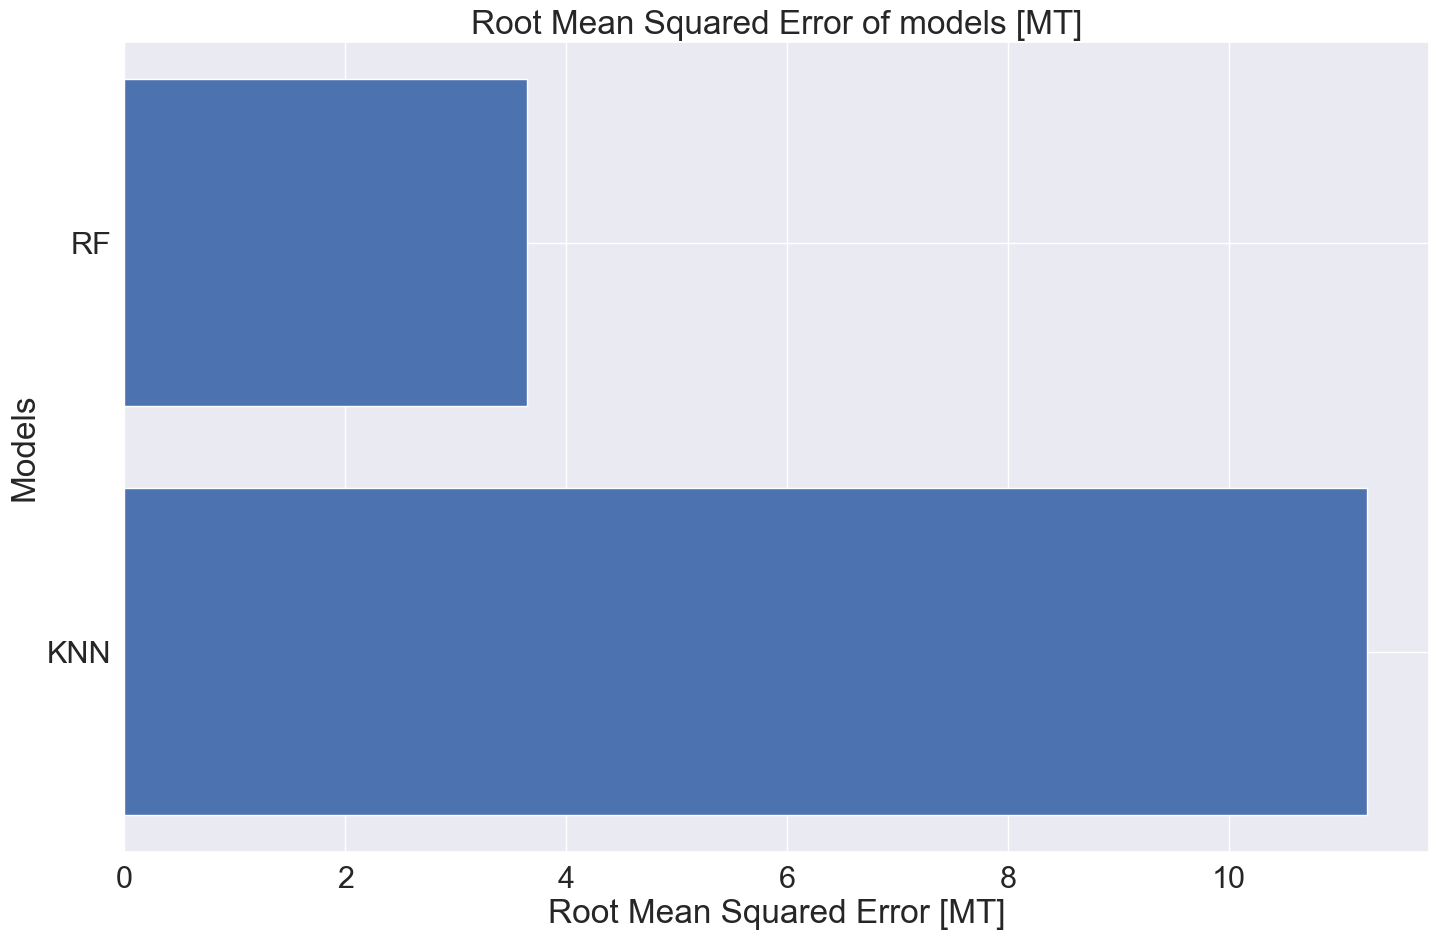

In [58]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['RMSE'], y = summary.index)
plt.xlabel("Root Mean Squared Error [MT]")
plt.ylabel("Models")
plt.title("Root Mean Squared Error of models [MT]")

Text(0.5, 1.0, 'Accuracy of models')

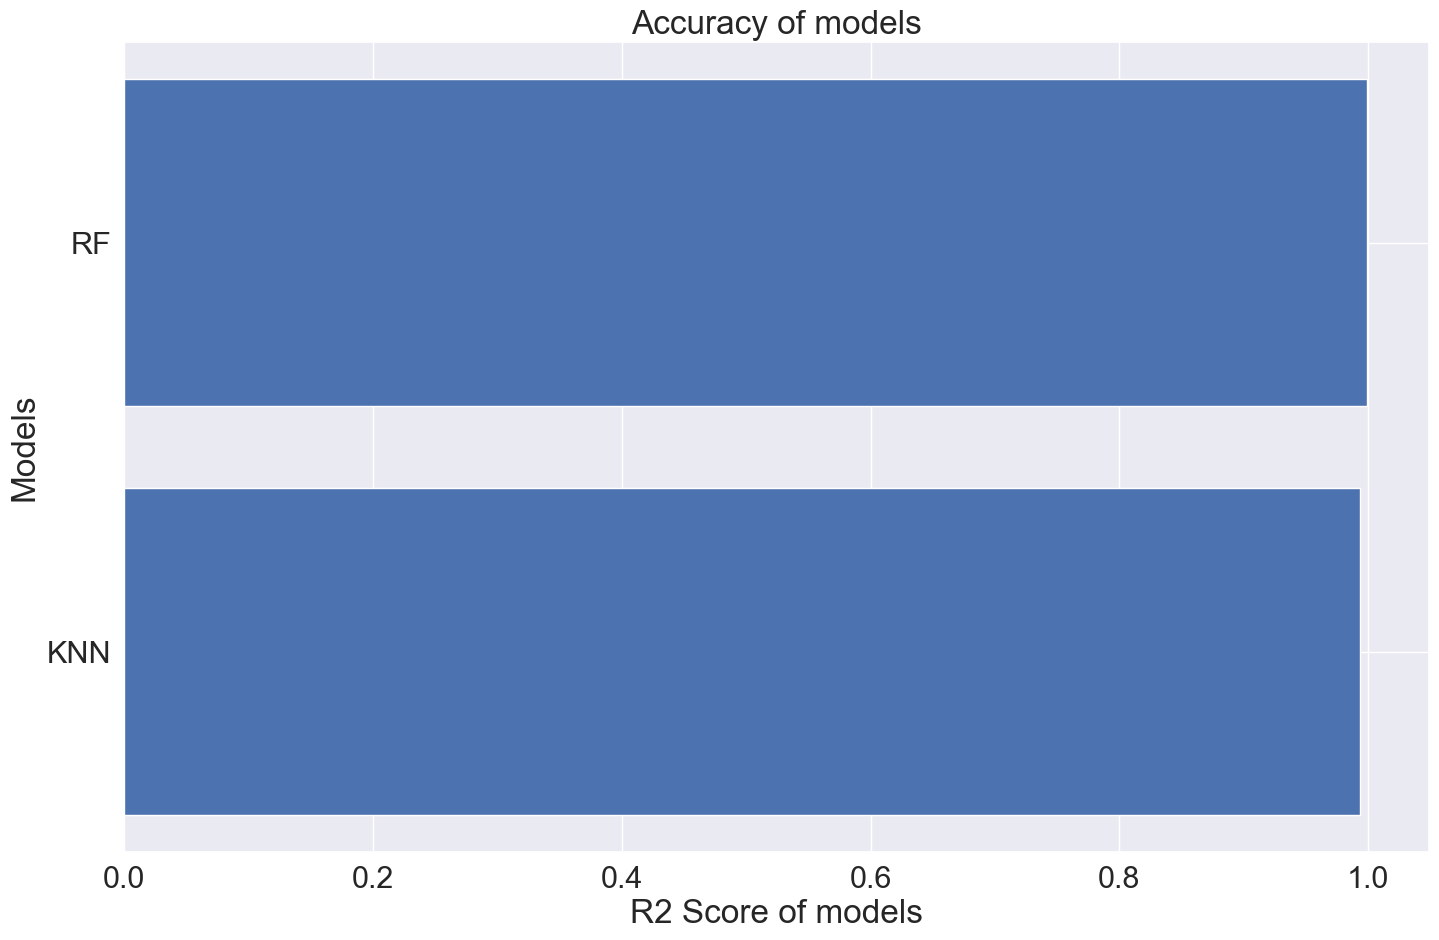

In [59]:
plt.figure(figsize=(15,10))
plt.barh(width = summary['R2_score'], y = summary.index)
plt.xlabel("R2 Score of models")
plt.ylabel("Models")
plt.title("Accuracy of models")